<a href="https://colab.research.google.com/github/MP-cod/Modelling-a-Neutron-Star/blob/main/Modelling_A_Neutron_Star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def initial_n():
  '''Initial number of neutrons per unit volume at r=0'''
  n=1                                 #Initial value of n
  err=1                               #Initial error
  tol=1e-15                           #Tolerance value
  count=0                             #To track total iterations for convergence

    #Newton-Raphson method
  while err > tol :                      #Until convergence of n
    count+= 1                         #Increment of count of the iteration
    fn= 236*n**(2.54) +n*mn -rho_s    #Find f(n_old)
    dfn= 236*2.54*n**(1.54) + mn      #Find f'(n_old)
    temp= n- fn/dfn                   #Calculate n_new using Newton raphson method
    err= np.abs(n-temp)               #Calculate the error
    n= temp                           #Use this n value in next iteration for f(n_old), f'(n_old)
  print("Newton-Raphson coverged after ", count, "iterations")
  return n


In [ ]:
def rho(p):

  '''
  Energy Density of a neutron satr at a give n pressure
  rho_s - Central density at r=0
  mn - mass of a neutron
  n - number density at given pressure
  '''

  n = (p*rho_s/363.44)**(1/2.54)
  return (236. * n**2.54 + n * mn)/rho_s

In [ ]:
def dp_dr(r,m,p,flag):
  '''
  Pressure gradient
  r - distance from the centre of of neutron star
  m - mass enclosed within the value of r
  p - pressure at theat value of r
  flag - choose between classical and relativistric models
  '''

  if flag==0:
    #Classical model
    y= -m*rho(p)/(r**2 + 1e-20)

  else:
    #Relativistic model
    y = -(p+rho(p))*(m + p*r**3)/(r**2 - 2*m*r + 1e-20)

  return y


In [ ]:
def dm_dr(r,m,p):

  '''
  Mass gradient
  Same r,m,p as we used for pressure gradient are to be used for mass gradient
  '''

  return rho(p)*r**2

In [ ]:
def RK4Solver(r,m,p,h,flag):

  '''
  Runge - Kutta 4th order Method
    Calculates 4 different pressure and mass gradients
    K1_ - Mass Gradients
    K2_ - Pressure Gradients
  '''
  y=np.zeros(2)                                          #stores the new values of m and p

  #Gradient 1 at start point
  k11= dm_dr(r,m,p)
  k21= dp_dr(r,m,p,flag)

  #Gradient 2 at mid point of start and end point
  k12= dm_dr(r+ 0.5*h, m+ 0.5*k11*h,  p+ 0.5*k21*h)
  k22= dp_dr(r+ 0.5*h, m+ 0.5*k11*h, p+ 0.5*k21*h, flag)

  #Gradient 3 at mid of start and end point
  k13= dm_dr(r+ 0.5*h, m+ 0.5*k12*h, p+ 0.5*k22*h)
  k23= dp_dr(r+ 0.5*h, m+ 0.5*k12*h, p+ 0.5*k22*h, flag)

  #Gradient 4 at end point
  k14= dm_dr(r+h, m+ k13*h, p+ k23*h)
  k24= dp_dr(r+h, m+ k13*h, p+ k23*h, flag)

  #updation of m and p
  y[0]= m + h*(k11+ 2*k12+ 2*k13+ k14)/6
  y[1]= p + h*(k21+ 2*k22+ 2*k23+ k24)/6

  return y


#Plotting Data

In [ ]:
def plot_data(color, label):

  #Mass profile
  plt.subplot(1,2,1)
  plt.plot(r*R0*1e-18, m*M0/Ms, color=color, linewidth=1.2, label=label)
  plt.xlabel('Distance, $r$ (km)', fontsize=13)
  plt.ylabel('Mass, $M/M_{sun}$', fontsize=13)
  plt.title('Mass profile of a neutron star', color='tab:red', weight= 'bold', fontsize= 15)
  plt.xlim(left=0)
  plt.ylim(bottom=0)
  plt.legend(fontsize=13, frameon=False)

  #Pressure profile
  plt.subplot(1,2,2)
  plt.plot(r*R0*1e-18, p*rho_s, color=color, linewidth=1.2, label=label)
  plt.xlabel('Distance, $r$ (km)', fontsize=13)
  plt.ylabel('Pressure, $P$ $(MeV/fm^{3})$', fontsize=13)
  plt.title('Pressure profile of a neutron star', color='tab:red', weight= 'bold', fontsize= 15)
  plt.xlim(left=0)
  plt.ylim(bottom=0)
  plt.legend(fontsize=13, frameon=False)

In [ ]:
# Simulation parameters and Conversion factors
hc=197.327                                        #conversion factor in MeV fm(h bar * c)
G = hc* 6.67259e-45                               #gravitational constant in MeV^-1 fm^3 kg^-1
Ms = 1.1157467e60                                 #mass of Sun in MeV
rho_s = 1665.3                                    #Central density of neutron star(Density at r=0)
M0 = (4*3.14159265*(G**3)*rho_s)**(-0.5)
R0 = G*M0
mn = 938.926                                      #Mass of neutron in MeV c^-2

In [ ]:
#Initialising Values and Arrays

'''values for radius, step size and tolerance value'''
N=1501                                                    #Total number of data points
r=np.linspace(0,15,N)                                     #Values of radius to compute enclosed mass within it, pressure and density profiles
h=r[1]-r[0]                                               #Step size for RK4Solver
tol=9e-5                                                  #Tolerance for RK4Solver

'''Arrays to store the updation values in RK4solver'''

m=np.zeros(N)                                             #Mass
p=np.zeros(N)                                             #Pressure

'''Initial number density of Neutrons at r=0'''
ni=initial_n()

'''Setting initial values in the array -  values at the centre of the Neutron Star'''
r[0] = 0                                                  #Radius
m[0] = 0                                                  #Mass
p[0] = 363.44 * (ni**2.54)/rho_s                          #Pressure

'''Setting flags for choosing between classical and relativistic model'''
flag_set=[0,1]

'''Printing Initial values'''
print("Initial number density, ni =", ni)
print("Initial pressure, P[0] = ", p[0]*rho_s, "MeV/fm^3")
print("Simulation range, R=0 to R=", r[-1]*R0*1e-18, "km")        #1e-18 is th conversion factor from femtometers to k
print("Step size for RK4 Solver:", h)


Newton-Raphson coverged after  5 iterations
Initial number density, ni = 1.2918969375342138
Initial pressure, P[0] =  696.5487390842761 MeV/fm^3
Simulation range, R=0 to R= 90.36486611870906 km
Step size for RK4 Solver: 0.01


#MODELLING A NEUTRON STAR


Classical model Results: P < 9e-05 found after 275 runs
Initial density, rho_s= 1665.3 MeV/fm^3
total mass= 10.075592302895434 times solar mass
radius of the Neutron Star=  16.627135365842467 km

Relativistic model Results: P < 9e-05 found after 161 runs
Initial density, rho_s= 1665.3 MeV/fm^3
total mass= 1.878156929086536 times solar mass
radius of the Neutron Star=  9.759405540820579 km



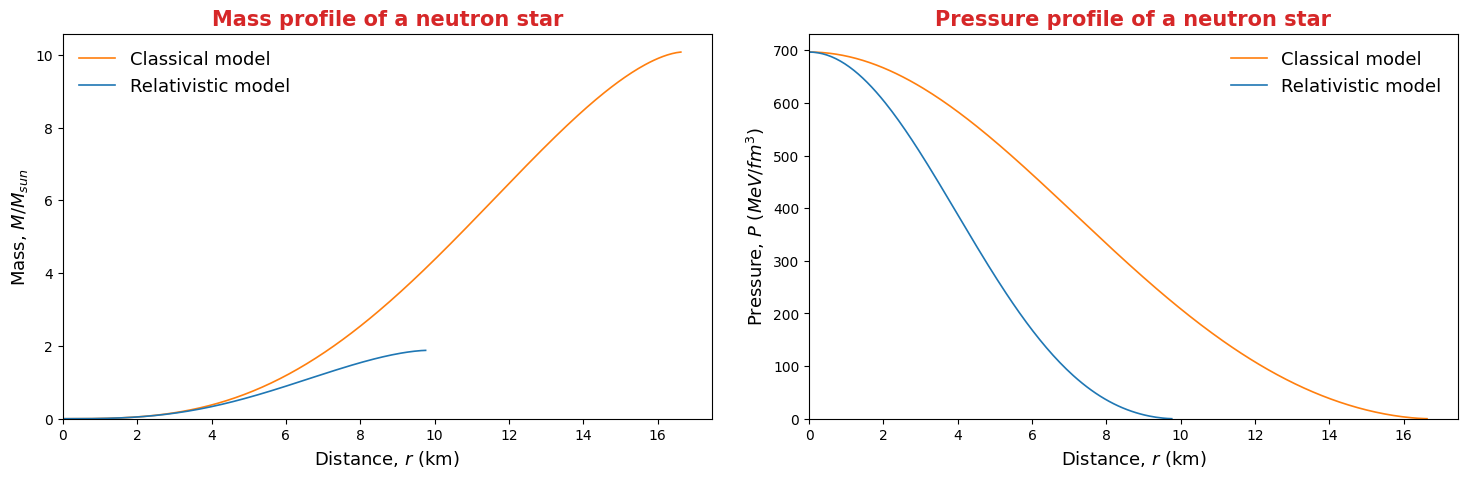

In [ ]:
'''using RK4 Numerical Method for modelling a neutron star'''
plt.figure(figsize = (18,5))
for k in range(0,2):
  flag=flag_set[k]
  for i in range(0, N-1):
    if flag==0:
      [m[i+1], p[i+1]] = RK4Solver(r[i],m[i],p[i],h,flag)
    else:
      [m[i+1], p[i+1]] = RK4Solver(r[i],m[i],p[i],h,flag)
    if p[i+1] < tol:
      break
  print()
  if i== N-2:
    lbl1= "Program didn't converge to P=0, extend the maximum values of r"
  else:
    lbl1=f"P < {tol} found after {i} runs"

  '''Keep only the used indices of array discarding the remaining ones'''
  m=m[:i+2]
  p=p[:i+2]
  r=r[:i+2]

  '''Time to visualise and print the results'''
  if flag==0:
    lbl="Classical model"
    plot_data('tab:orange', "Classical model")
  else:
    lbl="Relativistic model"
    plot_data('tab:blue', "Relativistic model")

  '''Printing the overall output'''
  print("=================================================================")
  print(lbl, "Results:", lbl1)
  print("=================================================================")
  print("Initial density, rho_s=", rho_s, "MeV/fm^3")
  print("total mass=", m[-1]*M0/Ms, "times solar mass")
  print("radius of the Neutron Star= ", r[-1]*R0*1e-18, "km")

print()
plt.subplots_adjust(wspace=0.15)
